# LeNET
* Yann Lecun은 간단한 기하학적 변형과 왜곡에도 불구하고 견고하게 MNIST 필기 문자를 인식하게 훈련된 LeNet이라는 ConvNets을 제안 
* LeNets의 핵심 아이디어는 최대 풀링 작업을 통해 더 낮은 계층에서 컨볼루션 연산을 교대로 수행하는 것
* 컨볼류선 작업은 다중 특징 맵에 가중치를 공유한 신중하게 선택된 로컬 수용 필드를 기반으로 한다. 
* 그런 다음 은닉층과 소프트맥스를 출력 계층으로 사용하는 기존 다층 퍼셉트론을 기반으로 더 높은 계층이 완전 연결된다.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
#define the convnet 
class LeNet:
    @staticmethod 
    def build(input_shape, classes):
        model = models.Sequential()
        # CONV => RELU => POOL
        model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(layers.Conv2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation="softmax"))
        return model

* 첫 번째 매개변수는 컨볼루션의 출력 필터 수이고 다음 튜플은 각 필터의 확장 
* padding = valid 출력이 입력보다 작음을 의미한다. 
* padding = same은 출력이 입력과 동일한 크기로 입력 주변 영역에 0으로 채워진다. 

* 컨볼루션 필터의 수를 이전 20개에서 50개로 늘린다. 더 깊은 계층으로 필터 수를 늘리는 것은 딥러닝에 사용되는 일반적인 기술이다.

In [3]:
# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

In [4]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [5]:
# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [7]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

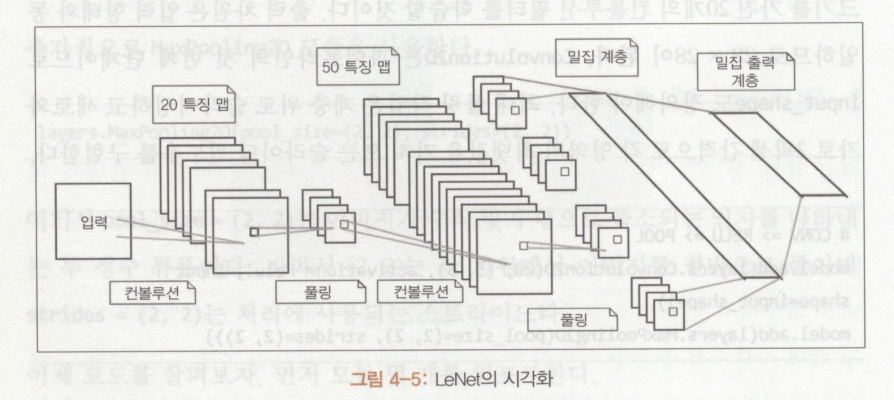

* kernel_size의 값이 (5, 5) 깊이가 1,커널이 20개 편향이 20

In [8]:
5 * 5 * 1 * 20 + 20

520

In [9]:
5 * 5  * 20 * 50 + 50

25050

In [10]:
4 * 4 * 50

800

In [11]:
800 * 500 + 500

400500

In [12]:
500 * 10 + 10

5010

In [13]:
# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/5
47/47 [==============================] - 11s 230ms/step - loss: 20.5553 - accuracy: 0.3920 - val_loss: 0.4307 - val_accuracy: 0.8761
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.2916 - accuracy: 0.9163 - val_loss: 0.2491 - val_accuracy: 0.9243
Epoch 3/5
47/47 [==============================] - 11s 248ms/step - loss: 0.1243 - accuracy: 0.9621 - val_loss: 0.1937 - val_accuracy: 0.9422
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.1817 - val_accuracy: 0.9461
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.1656 - val_accuracy: 0.9534


In [14]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1563 - accuracy: 0.9546

Test score: 0.15634511411190033
Test accuracy: 0.9545999765396118


In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
#import tensorflow_datasets as tfds

#CNN구조
#비교를 위해 RNN1 파일과 동일하게 세팅
max_len = 100 #200
n_words = 500 #10000
dim_embedding = 16 #256
EPOCHS = 100 #20
BATCH_SIZE = 64 #500

# IMDB데이터셋으로 긍정부정 분류

In [16]:
def load_data():
    #load data
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
    # Pad sequences with max_len
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
    return (X_train, y_train), (X_test, y_test)

def build_model():
    model = models.Sequential()
    #Input - Emedding Layer
    # the model will take as input an integer matrix of size (batch, input_length)
    # the model will output dimension (input_length, dim_embedding)
    # the largest integer in the input should be no larger
    # than n_words (vocabulary size).
    model.add(layers.Embedding(n_words, 
        dim_embedding, input_length=max_len))

    model.add(layers.Dropout(0.3))

    model.add(layers.Conv1D(256, 3, padding='valid', activation='relu')) #커널 : 256개

    #takes the maximum value of either feature vector from each of the n_words features
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [17]:
(X_train, y_train), (X_test, y_test) = load_data()
model=build_model()
model.summary()

model.compile(optimizer = "adam", loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

score = model.fit(X_train, y_train,
 epochs= EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_test, y_test)
)

score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

17465344/17464789 [==============================] - 5s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 256)          2560000   
_________________________________________________________________
dropout (Dropout)            (None, 200, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 256)          196864    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

KeyboardInterrupt: 